# 🧠 Predictive Modeling for Chronic Kidney Disease (CKD)

A machine learning project by using clinical data to build a prediction model for CKD.

This notebook is organized as a clear data science pipeline:
1. Setup & imports  
2. Load and inspect data  
3. Clean missing / invalid values  
4. Classify and encode features  
5. Correlation analysis and feature selection  
6. Train/test split and model building  
7. Evaluation and cross-validation  
8. Summary of findings  

---


## ⚙️ 1. Setup and Imports

In this section, we import the Python libraries required for:
- Data handling (`pandas`, `numpy`)  
- Visualization (`matplotlib`, `seaborn`)  
- Machine learning (`scikit-learn`)  


In [ ]:
import pandas as pd

## 📂 2. Load the CKD Dataset

We now load the CKD dataset into a pandas DataFrame. In the original analysis this used an absolute Windows path; for portability, you can replace it with a relative path such as `ckd.csv` when running on other systems.


In [ ]:
df = pd.read_csv('ckd.csv')

## 🔍 3. Initial Exploration: Unique Values and Missing Data

Here we loop over all columns to inspect:
- The data type of each column  
- The number of unique values  
This helps us understand which variables are categorical, binary, or continuous.


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f'Column: {column}')
    print(f'Data Type: {df[column].dtype}')
    print(f'Number of Unique Values: {num_unique}')

Column: bp (Diastolic)
Data Type: object
Number of Unique Values: 4
Column: bp limit
Data Type: object
Number of Unique Values: 5
Column: sg
Data Type: object
Number of Unique Values: 7
Column: al
Data Type: object
Number of Unique Values: 7
Column: class
Data Type: object
Number of Unique Values: 4
Column: rbc
Data Type: object
Number of Unique Values: 4
Column: su
Data Type: object
Number of Unique Values: 8
Column: pc
Data Type: object
Number of Unique Values: 4
Column: pcc
Data Type: object
Number of Unique Values: 4
Column: ba
Data Type: object
Number of Unique Values: 4
Column: bgr
Data Type: object
Number of Unique Values: 12
Column: bu
Data Type: object
Number of Unique Values: 10
Column: sod
Data Type: object
Number of Unique Values: 11
Column: sc
Data Type: object
Number of Unique Values: 9
Column: pot
Data Type: object
Number of Unique Values: 6
Column: hemo
Data Type: object
Number of Unique Values: 12
Column: pcv
Data Type: object
Number of Unique Values: 12
Column: rbcc
D

In [ ]:
columns_to_check = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
                    'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
                    'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
                    'affected', 'age']

In [ ]:
for column in columns_to_check:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")

Value counts for column: bp (Diastolic)
bp (Diastolic)
1           108
0            92
discrete      1
Name: count, dtype: int64


Value counts for column: bp limit
bp limit
0           95
1           59
2           46
discrete     1
Name: count, dtype: int64


Value counts for column: sg
sg
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
discrete          1
Name: count, dtype: int64


Value counts for column: al
al
< 0         116
2 - 2        27
3 - 3        23
1 - 1        21
≥ 4          13
discrete      1
Name: count, dtype: int64


Value counts for column: class
class
ckd         128
notckd       72
discrete      1
Name: count, dtype: int64


Value counts for column: rbc
rbc
0           175
1            25
discrete      1
Name: count, dtype: int64


Value counts for column: su
su
< 0         170
2 - 2         9
3 - 4         8
4 - 4         6
1 - 2         6
discrete      1
≥ 4           1
Name: count, dtype: int64


Value count

## 🧹 4. Cleaning: Handling 'discrete' Entries and Missing Values

Some cells in the dataset contain the string `'discrete'` instead of valid numeric or categorical values. In this step we:
- Identify the relevant columns to check  
- Replace `'discrete'` with `NaN`  
- Drop rows with missing values for this experiment  


In [ ]:
for column in columns_to_check:
    df[column] = df[column].replace('discrete', pd.NA)

In [ ]:
df.dropna(inplace=True)

## 🧱 5. Column Type Classification

We define a helper function `classify_column_type` that labels each column as:
- **Binary**: exactly two unique values  
- **Categorical**: non-numeric with more than two levels  
- **Numerical**: numeric with more than two unique values  

This classification guides how we encode the variables later.


In [ ]:
def classify_column_type(column):
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    
    if df[column].dtype == 'object':
        if num_unique == 2:
            return 'Binary'
        else:
            return 'Categorical'
    elif df[column].dtype in ['int64', 'float64']:
        if num_unique == 2:
            return 'Binary'
        else:
            return 'Numerical'
    else:
        return 'Unknown'

In [ ]:
column_types = {}

In [ ]:
for column in df.columns:
    column_types[column] = classify_column_type(column)

In [ ]:
for column, col_type in column_types.items():
    print(f"Column: {column}, Type: {col_type}")

Column: bp (Diastolic), Type: Binary
Column: bp limit, Type: Categorical
Column: sg, Type: Categorical
Column: al, Type: Categorical
Column: class, Type: Binary
Column: rbc, Type: Binary
Column: su, Type: Categorical
Column: pc, Type: Binary
Column: pcc, Type: Binary
Column: ba, Type: Binary
Column: bgr, Type: Categorical
Column: bu, Type: Categorical
Column: sod, Type: Categorical
Column: sc, Type: Categorical
Column: pot, Type: Categorical
Column: hemo, Type: Categorical
Column: pcv, Type: Categorical
Column: rbcc, Type: Categorical
Column: wbcc, Type: Categorical
Column: htn, Type: Binary
Column: dm, Type: Binary
Column: cad, Type: Binary
Column: appet, Type: Binary
Column: pe, Type: Binary
Column: ane, Type: Binary
Column: grf, Type: Categorical
Column: stage, Type: Categorical
Column: affected, Type: Binary
Column: age, Type: Categorical


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
binary_columns = ['bp (Diastolic)', 'class', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'affected']

In [ ]:
label_encoders = {}

## 🔐 6. Encoding Binary and Categorical Features

Next we prepare the data for modeling by encoding:
- **Binary columns** with `LabelEncoder`  
- **Categorical columns** with one-hot encoding (`pd.get_dummies`)  

This transforms all features into numeric form suitable for machine learning algorithms.


In [ ]:
for column in binary_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
categorical_columns = ['bp limit', 'sg', 'al', 'su', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf', 'stage', 'age']

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, prefix=categorical_columns)

In [ ]:
df = df_encoded

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

## 📈 7. Correlation Analysis and Feature Selection

We compute the correlation matrix and visualize it using a heatmap. Then we:
- Extract the absolute correlation between each feature and the target (`class`)  
- Drop features with correlation below a chosen threshold (e.g., 0.4)  
- Remove the `affected` column, which is perfectly correlated with the target and would cause data leakage  


In [ ]:
corr_matrix = df.corr()

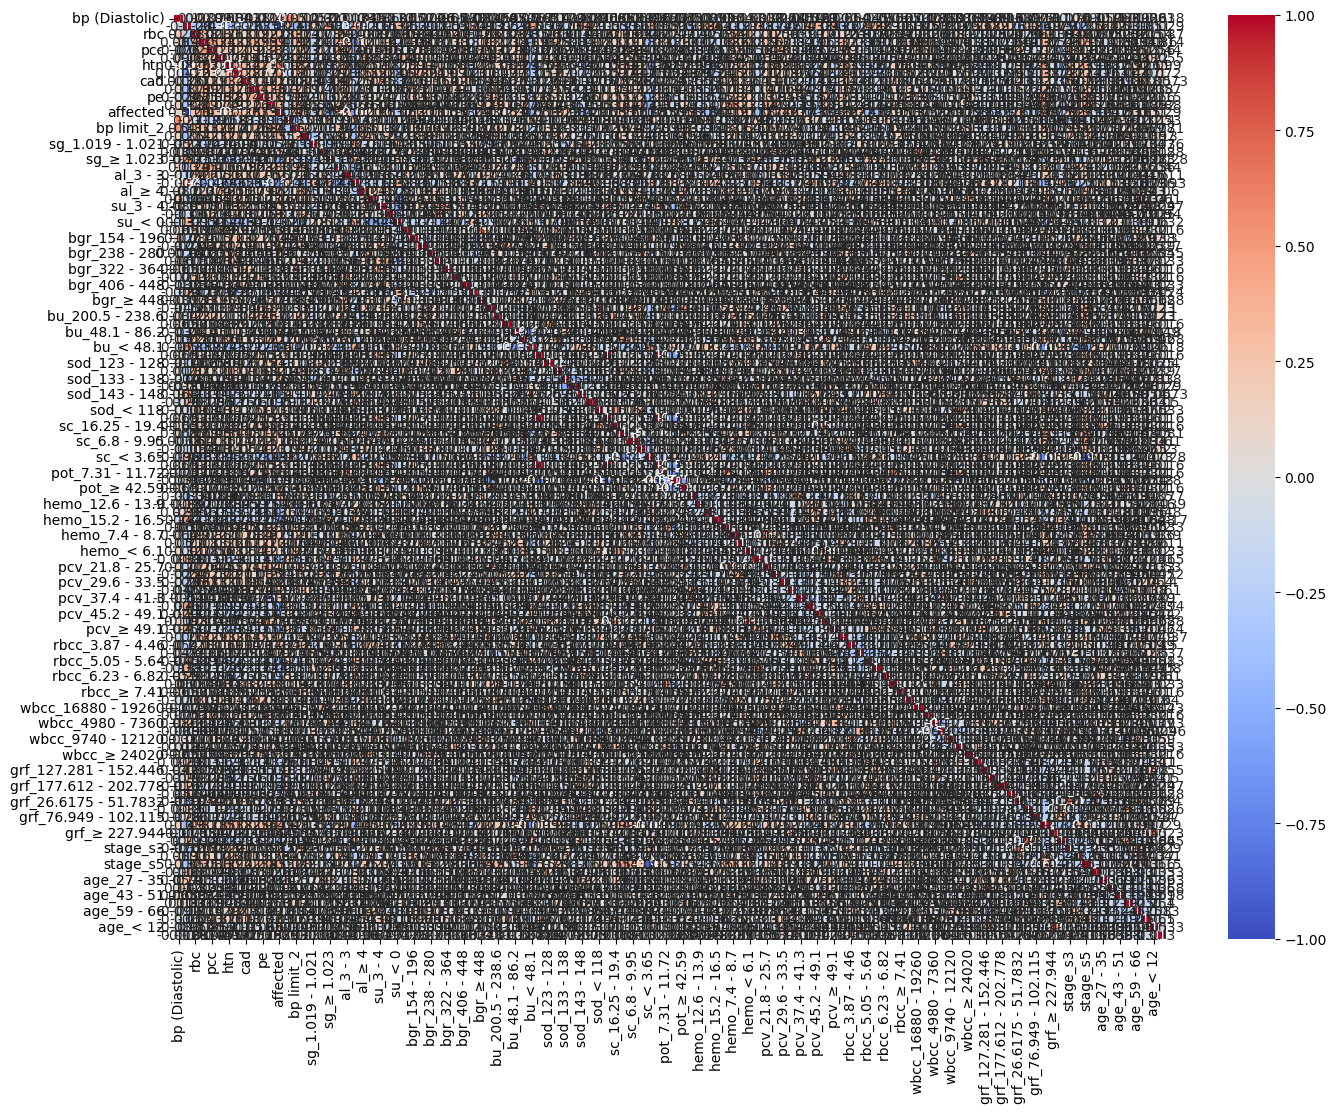

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr_with_target = corr_matrix['class'].abs().sort_values(ascending=False)

In [ ]:
print(corr_with_target)

class                1.000000
affected             1.000000
al_< 0               0.638222
htn                  0.599693
dm                   0.550350
                       ...   
age_43 - 51          0.052961
age_51 - 59          0.031431
age_≥ 74             0.028677
wbcc_< 4980          0.019118
wbcc_9740 - 12120    0.016567
Name: class, Length: 118, dtype: float64


In [ ]:
correlation_threshold = 0.4

In [ ]:
correlations = df.corr()['class'].abs()

In [ ]:
low_correlation_features = correlations[correlations < correlation_threshold].index

In [ ]:
df = df.drop(columns=low_correlation_features)

In [ ]:
print(df.columns)

Index(['class', 'pc', 'htn', 'dm', 'affected', 'bp limit_2', 'sg_≥ 1.023',
       'al_< 0', 'bu_< 48.1', 'sod_143 - 148', 'hemo_15.2 - 16.5',
       'pcv_41.3 - 45.2', 'pcv_≥ 49.1', 'rbcc_5.05 - 5.64', 'grf_< 26.6175'],
      dtype='object')


In [ ]:
df = df.drop(columns=['affected'])

In [ ]:
X = df.drop('class', axis=1)

In [ ]:
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

## ✂️ 8. Train/Test Split

Here we separate the processed dataset into:
- Features matrix `X`  
- Target vector `y`  
and perform an **80/20 train-test split** using `train_test_split`.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [ ]:
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.95


In [ ]:
feature_importances = rf_model.feature_importances_

In [ ]:
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [ ]:
features_df = features_df.sort_values(by='Importance', ascending=False)

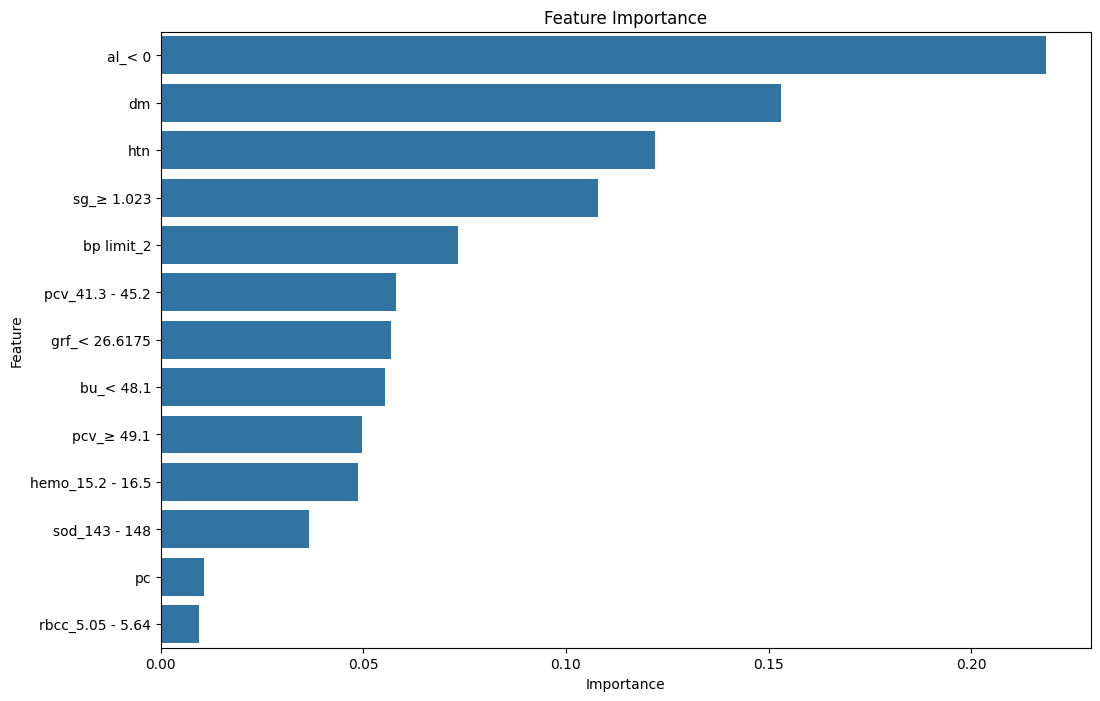

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.show()

## 🔁 10. Cross-Validation

To assess the robustness of the model, we perform **k-fold cross-validation** (with `cv=5`). We then review the distribution of scores and the mean accuracy as a more stable performance estimate.


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

In [ ]:
print(f"Cross-validation scores: {cv_scores}")

Cross-validation scores: [0.95  0.95  0.925 0.975 0.95 ]


In [ ]:
print(f"Mean cross-validation score: {cv_scores.mean()}")

Mean cross-validation score: 0.95


## ✅ 11. Summary and Interpretation

In this notebook, we built a predictive model for Chronic Kidney Disease (CKD) using clinical variables. The pipeline included:
- Careful preprocessing and cleaning of invalid entries (`'discrete'`) and missing values  
- Classification and encoding of binary, categorical, and numerical features  
- Correlation-based feature selection and removal of a perfectly correlated leakage feature (`affected`)  
- Training a Random Forest classifier and evaluating its performance on a held-out test set  
- Performing cross-validation to confirm robustness of the model  

The model achieved high accuracy (around **95%**), and the most important features—such as albumin levels (`al`), diabetes (`dm`), hypertension (`htn`), specific gravity (`sg`), and blood pressure categories (`bp limit`)—align well with known CKD risk factors.

